<a href="https://colab.research.google.com/github/remanx2558/MIDBReviews/blob/master/FastText_HAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

from gensim.models import KeyedVectors


In [2]:
reviews_df = pd.read_csv(r"/content/drive/My Drive/malia/train.csv")
reviews_df.isnull().values.any()
reviews_df.sentiment= reviews_df.sentiment.fillna(0.0).astype(int)#this will conver float into int and also manage missing values

print(reviews_df.dtypes)

text         object
sentiment     int64
dtype: object


In [4]:
def clean(text):
    '''
    '''
    text = text.lower()
    text = text.replace("ain't", "am not")
    text = text.replace("aren't", "are not")
    text = text.replace("can't", "cannot")
    text = text.replace("can't've", "cannot have")
    text = text.replace("'cause", "because")
    text = text.replace("could've", "could have")
    text = text.replace("couldn't", "could not")
    text = text.replace("couldn't've", "could not have")
    text = text.replace("should've", "should have")
    text = text.replace("should't", "should not")
    text = text.replace("should't've", "should not have")
    text = text.replace("would've", "would have")
    text = text.replace("would't", "would not")
    text = text.replace("would't've", "would not have")
    text = text.replace("didn't", "did not")
    text = text.replace("doesn't", "does not")
    text = text.replace("don't", "do not")
    text = text.replace("hadn't", "had not")
    text = text.replace("hadn't've", "had not have")
    text = text.replace("hasn't", "has not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd", "he would")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd've", "he would have")
    text = text.replace("'s", "")
    text = text.replace("'t", "")
    text = text.replace("'ve", "")
    text = text.replace(".", " . ")
    text = text.replace("!", " ! ")
    text = text.replace("?", " ? ")
    text = text.replace(";", " ; ")
    text = text.replace(":", " : ")
    text = text.replace(",", " , ")
    text = text.replace("´", "")
    text = text.replace("‘", "")
    text = text.replace("’", "")
    text = text.replace("“", "")
    text = text.replace("”", "")
    text = text.replace("\'", "")
    text = text.replace("\"", "")
    text = text.replace("-", "")
    text = text.replace("–", "")
    text = text.replace("—", "")
    text = text.replace("[", "")
    text = text.replace("]","")
    text = text.replace("{","")
    text = text.replace("}", "")
    text = text.replace("/", "")
    text = text.replace("|", "")
    text = text.replace("(", "")
    text = text.replace(")", "")
    text = text.replace("$", "")
    text = text.replace("+", "")
    text = text.replace("*", "")
    text = text.replace("%", "")
    text = text.replace("#", "")
    text = text.replace("\n", " \n ")
    text = text.replace("\n", "")
    text = text.replace("_", " _ ")
    text = text.replace("_", "")
    text = ''.join([i for i in text if not i.isdigit()])

    return text

In [5]:
reviews = reviews_df['text'].values


In [6]:
cleaned_reviews = [clean(r) for r in reviews] 


In [7]:
reviews_df['text'] = cleaned_reviews


In [9]:
# Shuffling data
reviews_df = reviews_df.sample(frac=1).reset_index(drop=True)

# Extracting all text
reviews = reviews_df['text'].values
reviews_text = []

for p in zip(reviews) : 
        reviews_text.append(p)

In [10]:
training_df = reviews_df.loc[:10000]
reviews_filtered = training_df['text'].values
training_reviews = reviews_df['text']
labels = reviews_df['sentiment']


In [11]:
dict1 ={
    'reviews' : training_reviews,
    'labels' : labels
}
sentiment_df = pd.DataFrame.from_dict(dict1)

In [12]:
dict2 ={
    'reviews_text' : reviews_text
}
reviews_text_df = pd.DataFrame.from_dict(dict2)

In [13]:
import numpy as np
import pandas as pd
import pickle
from collections import defaultdict
import re
from bs4 import BeautifulSoup
import sys
import os
os.environ['KERAS_BACKEND']='theano'
from keras.preprocessing.text import Tokenizer,text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout, LSTM, GRU, Bidirectional, TimeDistributed
from keras.models import Model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
plt.switch_backend('agg')
from keras import backend as K
from keras.engine.topology import Layer, InputSpec
from keras import initializers
%matplotlib inline

In [14]:
def clean_str(string):
    string = re.sub(r"\\", "", string)
    string = re.sub(r"\'", "", string)
    string = re.sub(r"\"", "", string)
    return string.strip().lower()

In [15]:
MAX_SENT_LENGTH = 100
MAX_SENTS = 15
MAX_NB_WORDS = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2

In [16]:
sentiment_df = sentiment_df.dropna()
sentiment_df = sentiment_df.reset_index(drop=True)
print('Shape of dataset ',sentiment_df.shape)
print(sentiment_df.columns)
print('No. of unique classes',len(set(sentiment_df['labels'])))

Shape of dataset  (25005, 2)
Index(['reviews', 'labels'], dtype='object')
No. of unique classes 2


In [17]:
import nltk
from nltk import tokenize

reviews = []
labels = []
texts = []

In [18]:
macronum=sorted(set(sentiment_df['labels']))
macro_to_id = dict((note, number) for number, note in enumerate(macronum))

In [19]:
def fun(i):
    return macro_to_id[i]

sentiment_df['labels']=sentiment_df['labels'].apply(fun)

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
for i in range(sentiment_df.reviews.shape[0]):
    text = BeautifulSoup(sentiment_df.reviews[i])
    text=clean_str(str(text.get_text().encode()).lower())
    texts.append(text)
    sentences = tokenize.sent_tokenize(text)
    reviews.append(sentences)


for i in sentiment_df['labels']:
    labels.append(i)

In [22]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)

data = np.zeros((len(texts), MAX_SENTS, MAX_SENT_LENGTH), dtype='int32')

for i, sentences in enumerate(reviews):
    for j, sent in enumerate(sentences):
        if j< MAX_SENTS:
            wordTokens = text_to_word_sequence(sent)
            k=0
            for _, word in enumerate(wordTokens):
                if k<MAX_SENT_LENGTH and tokenizer.word_index[word]<MAX_NB_WORDS:
                    data[i,j,k] = tokenizer.word_index[word]
                    k=k+1

In [23]:
word_index = tokenizer.word_index
print('No. of %s unique tokens.' % len(word_index))

No. of 97579 unique tokens.


In [24]:
labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)


indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
#labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

Shape of data tensor: (25005, 15, 100)
Shape of label tensor: (25005, 2)


In [25]:
x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

In [26]:
import pickle
import itertools
import gensim
from sklearn.model_selection import train_test_split
from numpy import zeros
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from gensim.models import Word2Vec
text_reviews = [str(r) for r in reviews_text_df['reviews_text'].values]
sentences = []

for review in text_reviews:
    words = text_to_word_sequence(review)
    sentences.append(words)

embeddings_model = Word2Vec(sentences, min_count=1, sg=1, size=128)
words = list(embeddings_model.wv.vocab)
print('{} WORDS '.format(len(words)))
print('Printing first 100:')
print(words[:100])

98390 WORDS 
Printing first 100:
["'having", 'just', 'watched', 'this', 'film', 'again', 'from', 'a', 'showing', 'off', 'vh', 'i', 'had', 'to', 'comment', 'the', 'first', 'time', 'saw', 'on', 'tv', 'it', 'was', 'about', 'and', 'remember', 'taping', 'of', 'my', 'mother', 'betamax', 'wound', 'up', 'in', 'black', 'white', 'for', 'some', 'reason', 'which', 'gave', 'period', 'look', 'that', 'grew', 'like', 'very', 'distinctively', 'beginning', 'with', 'song', 'bonnie', 'as', 'camera', 'panned', 'over', 'scene', 'liverpool', 'also', 'opening', 'where', 'paul', 'gestures', 'girls', 'says', 'talent', 'so', 'great', 'irritation', 'popped', 'taped', 'version', 'remembered', 'opens', 'she', 'loves', 'you', 'instead', 'when', 'see', 'how', 'slowly', 'pans', 'vs', 'speed', 'music', 'can', 'does', 'not', 'fit', 'later', 'sees', 'he', 'somehow', 'having', 'earlier', 'word', 'did', 'seem', 'either']


In [ ]:
!wget https://drive.google.com/open?id=1xzt06g_xeP1DitFXhJprF5VTwzNEUYhq
!unzip wiki-news-300d-1M.vec.zip

In [27]:
model_ft = KeyedVectors.load_word2vec_format('/content/drive/My Drive/malia/wiki-news-300d-1M.vec', binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [35]:
EMBEDDING_DIM = 300
MAX_NUM_WORDS=97580
print('Preparing embedding matrix.fast text')

# prepare embedding matrix
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    if word in model_ft.vocab:
      embedding_vector = model_ft[word]
      embedding_vector = np.array(embedding_vector)
      if embedding_vector is not None:
          # words not found in embedding index will be all-zeros.
          embedding_matrix[i] = embedding_vector
print(embedding_matrix.shape)



embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SENT_LENGTH,
                            trainable=True)        

Preparing embedding matrix.fast text
(97580, 300)


In [36]:
sentence_input = Input(shape=(MAX_SENT_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sentence_input)
l_lstm = Bidirectional(LSTM(128))(embedded_sequences)
sentEncoder = Model(sentence_input, l_lstm)

review_input = Input(shape=(MAX_SENTS,MAX_SENT_LENGTH), dtype='int32')
review_encoder = TimeDistributed(sentEncoder)(review_input)
l_lstm_sent = Bidirectional(LSTM(128))(review_encoder)
preds = Dense(len(macronum), activation='softmax')(l_lstm_sent)
model = Model(review_input, preds)

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

print("Hierachical LSTM")
model.summary()

Hierachical LSTM
Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 15, 100)]         0         
_________________________________________________________________
time_distributed (TimeDistri (None, 15, 256)           29713296  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 2)                 514       
Total params: 30,108,050
Trainable params: 30,108,050
Non-trainable params: 0
_________________________________________________________________


In [40]:
cp=ModelCheckpoint('model_han_.hdf5',monitor='val_acc',verbose=1,save_best_only=True)
history=model.fit(x_train, y_train, validation_data=(x_val, y_val),
          epochs=2, batch_size=2,callbacks=[cp])

Epoch 1/2
10002/10002 [==============================] - ETA: 0s - loss: 0.6946 - acc: 0.4961
Epoch 00001: val_acc improved from -inf to 0.51130, saving model to model_han_.hdf5
10002/10002 [==============================] - 1526s 153ms/step - loss: 0.6946 - acc: 0.4961 - val_loss: 0.6931 - val_acc: 0.5113
Epoch 2/2
10002/10002 [==============================] - ETA: 0s - loss: 0.6932 - acc: 0.5029
Epoch 00002: val_acc did not improve from 0.51130
10002/10002 [==============================] - 1506s 151ms/step - loss: 0.6932 - acc: 0.5029 - val_loss: 0.6952 - val_acc: 0.4887


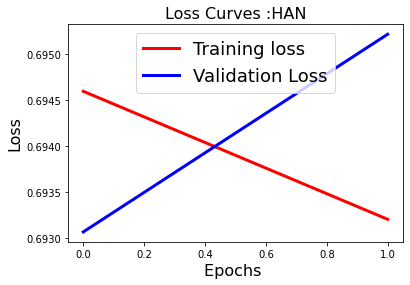

In [41]:
fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :HAN',fontsize=16)
fig1.savefig('loss_han.png')
plt.show()

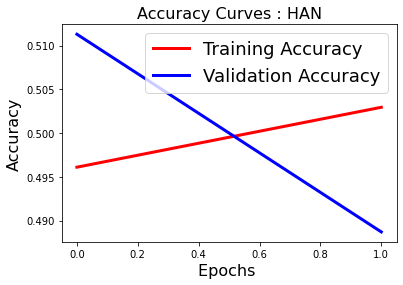

In [42]:
fig2=plt.figure()
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves : HAN',fontsize=16)
fig2.savefig('accuracy_han.png')
plt.show()

In [43]:
from PIL import Image
display(Image.open('han_model.png'))  

FileNotFoundError: ignored